# Inference for publication!

In [30]:
import sys
sys.path.append("/media/hdd/viscent/SR-UNet")
from utils.inference_utils import *

In [31]:
dhcp_train_loader, dhcp_test_loader, dhcp_val_loader = get_dataloader('dhcp',100)
hcp_train_loader, hcp_test_loader, hcp_val_loader = get_dataloader('hcp',100)
brats_train_loader, brats_test_loader, brats_val_loader = get_dataloader('brats',100)

model_vae_dhcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-dhcp.pth')
model_unet_dhcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/unet-dhcp-last.pth')
model_vae_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-hcp-last.pth')
model_unet_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/unet-hcp.pth')
model_vae_dhcp.eval()
model_vae_hcp.eval()
model_unet_dhcp.eval()
model_unet_hcp.eval()

[08/16/22 02:55:49] INFO     colossalai - root - INFO: Creating dataset with 80 examples

                    INFO     colossalai - root - INFO: length of list_images_t1: 80

  0%|          | 0/80 [00:00<?, ?it/s]

[08/16/22 02:55:51] INFO     colossalai - root - INFO: Creating dataset with 20 examples

                    INFO     colossalai - root - INFO: length of list_images_t1: 20

  0%|          | 0/20 [00:00<?, ?it/s]

[08/16/22 02:55:52] INFO     colossalai - root - INFO: Creating dataset with 80 examples

  0%|          | 0/80 [00:00<?, ?it/s]

[08/16/22 02:55:53] INFO     colossalai - root - INFO: Creating dataset with 20 examples

  0%|          | 0/20 [00:00<?, ?it/s]

[08/16/22 02:55:54] INFO     colossalai - root - INFO: Creating dataset with 80 examples

  0%|          | 0/80 [00:00<?, ?it/s]

[08/16/22 02:55:55] INFO     colossalai - root - INFO: Creating dataset with 20 examples

  0%|          | 0/20 [00:00<?, ?it/s]

UNet3D(
  (encoders): ModuleList(
    (0): Encoder(
      (basic_module): DoubleConv(
        (SingleConv1): SingleConv(
          (groupnorm): GroupNorm(1, 1, eps=1e-05, affine=True)
          (conv): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
        (SingleConv2): SingleConv(
          (groupnorm): GroupNorm(1, 8, eps=1e-05, affine=True)
          (conv): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
      )
    )
    (1): Encoder(
      (pooling): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (basic_module): DoubleConv(
        (SingleConv1): SingleConv(
          (groupnorm): GroupNorm(1, 16, eps=1e-05, affine=True)
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
        

In [32]:
def infer_and_save(model, image_tensor, target_tensor, save_name):
    save_path = '/media/hdd/viscent/SR-UNet/inference/publish/Fig_6'
    with torch.no_grad():
        output_tensor = model(image_tensor)
        image_array = image_tensor.cpu().numpy()[0,0]
        output_array = output_tensor.cpu().numpy()[0,0]
        target_array = target_tensor.cpu().numpy()[0,0]
        image_shape = image_array.shape
        fig = plt.Figure(dpi=1200)
        plt.imshow(image_array[...,image_shape[0]//2], cmap='gray')
        plt.axis('off')
        plt.gcf()
        plt.savefig(save_path + '/' + 'image_' + save_name + '.png', dpi=1200)
        fig = plt.Figure(dpi=1200)
        plt.imshow(output_array[...,image_shape[0]//2], cmap='gray')
        plt.axis('off')
        plt.gcf()
        plt.savefig(save_path + '/' + 'output_' + save_name + '.png', dpi=1200)
        fig = plt.Figure(dpi=1200)
        plt.imshow(target_array[...,image_shape[0]//2], cmap='gray')
        plt.axis('off')
        plt.gcf()
        plt.savefig(save_path + '/' + 'target_' + save_name + '.png', dpi=1200)
        return output_tensor

## Infer!

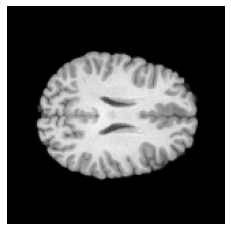

In [33]:
image_tensor_dhcp, target_tensor_dhcp = dhcp_val_loader.__iter__().__next__()
image_tensor_hcp, target_tensor_hcp = hcp_val_loader.__iter__().__next__()
image_tensor_dhcp = image_tensor_dhcp.cuda()
target_tensor_dhcp = target_tensor_dhcp.cuda()
image_tensor_hcp = image_tensor_hcp.cuda()
target_tensor_hcp = target_tensor_hcp.cuda()
model_vae_dhcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-dhcp.pth')
model_unet_dhcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/unet-dhcp-last.pth')
output_vae_hcp_hcp=infer_and_save(model_vae_hcp, image_tensor_hcp, target_tensor_hcp, 'vae-hcp-hcp')
output_unet_hcp_hcp=infer_and_save(model_unet_hcp, image_tensor_hcp, target_tensor_hcp, 'unet-hcp-hcp')
output_vae_dhcp_hcp=infer_and_save(model_vae_dhcp, image_tensor_hcp, target_tensor_hcp, 'vae-dhcp-hcp')
output_unet_dhcp_hcp=infer_and_save(model_unet_dhcp, image_tensor_hcp, target_tensor_hcp, 'unet-dhcp-hcp')

In [34]:
image_tensor_dhcp, target_tensor_dhcp = load_image(mode='h5',paths=['/media/hdd/viscent/SR-UNet/dev/hdd/dhcp/dhcp_lores/preprocessed_h5_d5b3/sub-CC00051XX02.h5'])
model_vae_dhcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-dhcp-0706.pth')
model_unet_dhcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/unet-dhcp-0706.pth')
model_vae_dhcp.augmentation = False
image_tensor_dhcp = image_tensor_dhcp.cuda()
target_tensor_dhcp = target_tensor_dhcp.cuda()
image_tensor_hcp = image_tensor_hcp.cuda()
target_tensor_hcp = target_tensor_hcp.cuda()

# infer_and_save(model_vae_dhcp, image_tensor_dhcp, target_tensor_dhcp, 'vae-dhcp-dhcp')
# infer_and_save(model_unet_dhcp, image_tensor_dhcp, target_tensor_dhcp, 'unet-dhcp-dhcp')

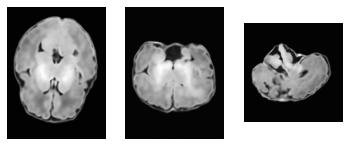

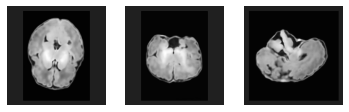

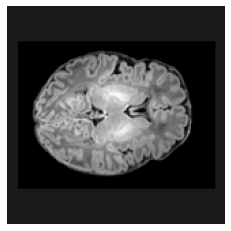

In [56]:
image_tensor_dhcp, target_tensor_dhcp = load_image(mode='h5',paths=['/media/hdd/viscent/SR-UNet/dev/hdd/dhcp/dhcp_lores/preprocessed_h5_d5b3/sub-CC00051XX02.h5'])
subject = tio.Subject(
    image=tio.ScalarImage(tensor = image_tensor_dhcp[0].cpu().detach().numpy()),
    output=tio.ScalarImage(tensor = model_vae_dhcp(image_tensor_dhcp)[0].cpu().detach().numpy()),
    target=tio.ScalarImage(tensor = target_tensor_dhcp[0].cpu().detach().numpy()),
)

transforms = tio.Compose([
    tio.ToCanonical(),
    tio.CropOrPad((160,160,160))
])

display_multiplanar_center(subject.output.data[0].cpu().numpy())

subject_transformed = transforms(subject)
display_multiplanar_center(subject_transformed.output.data[0].cpu().numpy())

image_tensor_dhcp = subject_transformed.image.data.unsqueeze(0).cuda()
target_tensor_dhcp = subject_transformed.target.data.unsqueeze(0).cuda()
output_tensor_dhcp = subject_transformed.output.data.unsqueeze(0).cuda()
image_tensor_dhcp = image_tensor_dhcp.transpose(4,2)
output_vae_dhcp_dhcp = output_tensor_dhcp.transpose(4,2)
target_tensor_dhcp = target_tensor_dhcp.transpose(4,2)
output_array = output_vae_dhcp_dhcp[0,0].cpu().numpy()
target_array = target_tensor_dhcp[0,0].cpu().numpy()
image_array = image_tensor_dhcp[0,0].cpu().numpy()
image_shape = output_array.shape

save_path = '/media/hdd/viscent/SR-UNet/inference/publish/Fig_6'
fig = plt.Figure(dpi=1200)
plt.imshow(output_array[...,image_shape[0]//2], cmap='gray')
plt.axis('off')
plt.gcf()
plt.savefig(save_path + '/' + 'output_' + 'vae-dhcp-dhcp' + '.png', dpi=1200)
fig = plt.Figure(dpi=1200)
plt.imshow(image_array[...,image_shape[0]//2], cmap='gray')
plt.axis('off')
plt.gcf()
plt.savefig(save_path + '/' + 'image_' + 'vae-dhcp-dhcp' + '.png', dpi=1200)
fig = plt.Figure(dpi=1200)
plt.imshow(target_array[...,image_shape[0]//2], cmap='gray')
plt.axis('off')
plt.gcf()
plt.savefig(save_path + '/' + 'target_' + 'vae-dhcp-dhcp' + '.png', dpi=1200)

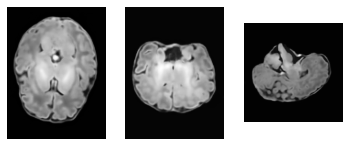

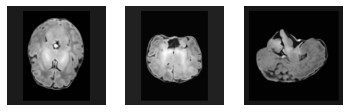

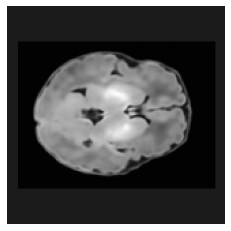

In [45]:
image_tensor_dhcp, target_tensor_dhcp = load_image(mode='h5',paths=['/media/hdd/viscent/SR-UNet/dev/hdd/dhcp/dhcp_lores/preprocessed_h5_d5b3/sub-CC00051XX02.h5'])
subject = tio.Subject(
    image=tio.ScalarImage(tensor = image_tensor_dhcp[0].cpu().detach().numpy()),
    output=tio.ScalarImage(tensor = model_unet_dhcp(image_tensor_dhcp)[0].cpu().detach().numpy()),
    target=tio.ScalarImage(tensor = target_tensor_dhcp[0].cpu().detach().numpy()),
)

transforms = tio.Compose([
    tio.ToCanonical(),
    tio.CropOrPad((160,160,160))
])

display_multiplanar_center(subject.output.data[0].cpu().numpy())

subject_transformed = transforms(subject)
display_multiplanar_center(subject_transformed.output.data[0].cpu().numpy())

image_tensor_dhcp = subject_transformed.image.data.unsqueeze(0).cuda()
target_tensor_dhcp = subject_transformed.target.data.unsqueeze(0).cuda()
output_tensor_dhcp = subject_transformed.output.data.unsqueeze(0).cuda()
image_tensor_dhcp = image_tensor_dhcp.transpose(4,2)
output_unet_dhcp_dhcp = output_tensor_dhcp.transpose(4,2)
target_tensor_dhcp = target_tensor_dhcp.transpose(4,2)
output_array = output_vae_dhcp_dhcp[0,0].cpu().numpy()
target_array = target_tensor_dhcp[0,0].cpu().numpy()
image_array = image_tensor_dhcp[0,0].cpu().numpy()
image_shape = output_array.shape

save_path = '/media/hdd/viscent/SR-UNet/inference/publish/Fig_6'
fig = plt.Figure(dpi=1200)
plt.imshow(output_array[...,image_shape[0]//2], cmap='gray')
plt.axis('off')
plt.gcf()
plt.savefig(save_path + '/' + 'output_' + 'unet-dhcp-dhcp' + '.png', dpi=1200)

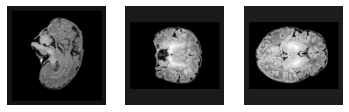

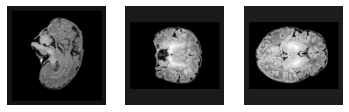

In [54]:
display_multiplanar_center(target_tensor_dhcp[0,0].cpu().numpy())

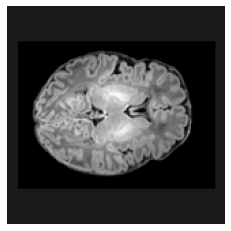

In [47]:
output_vae_hcp_dhcp=infer_and_save(model_vae_hcp, image_tensor_dhcp, target_tensor_dhcp, 'vae-hcp-dhcp')
output_unet_hcp_dhcp=infer_and_save(model_unet_hcp, image_tensor_dhcp, target_tensor_dhcp, 'unet-hcp-dhcp')

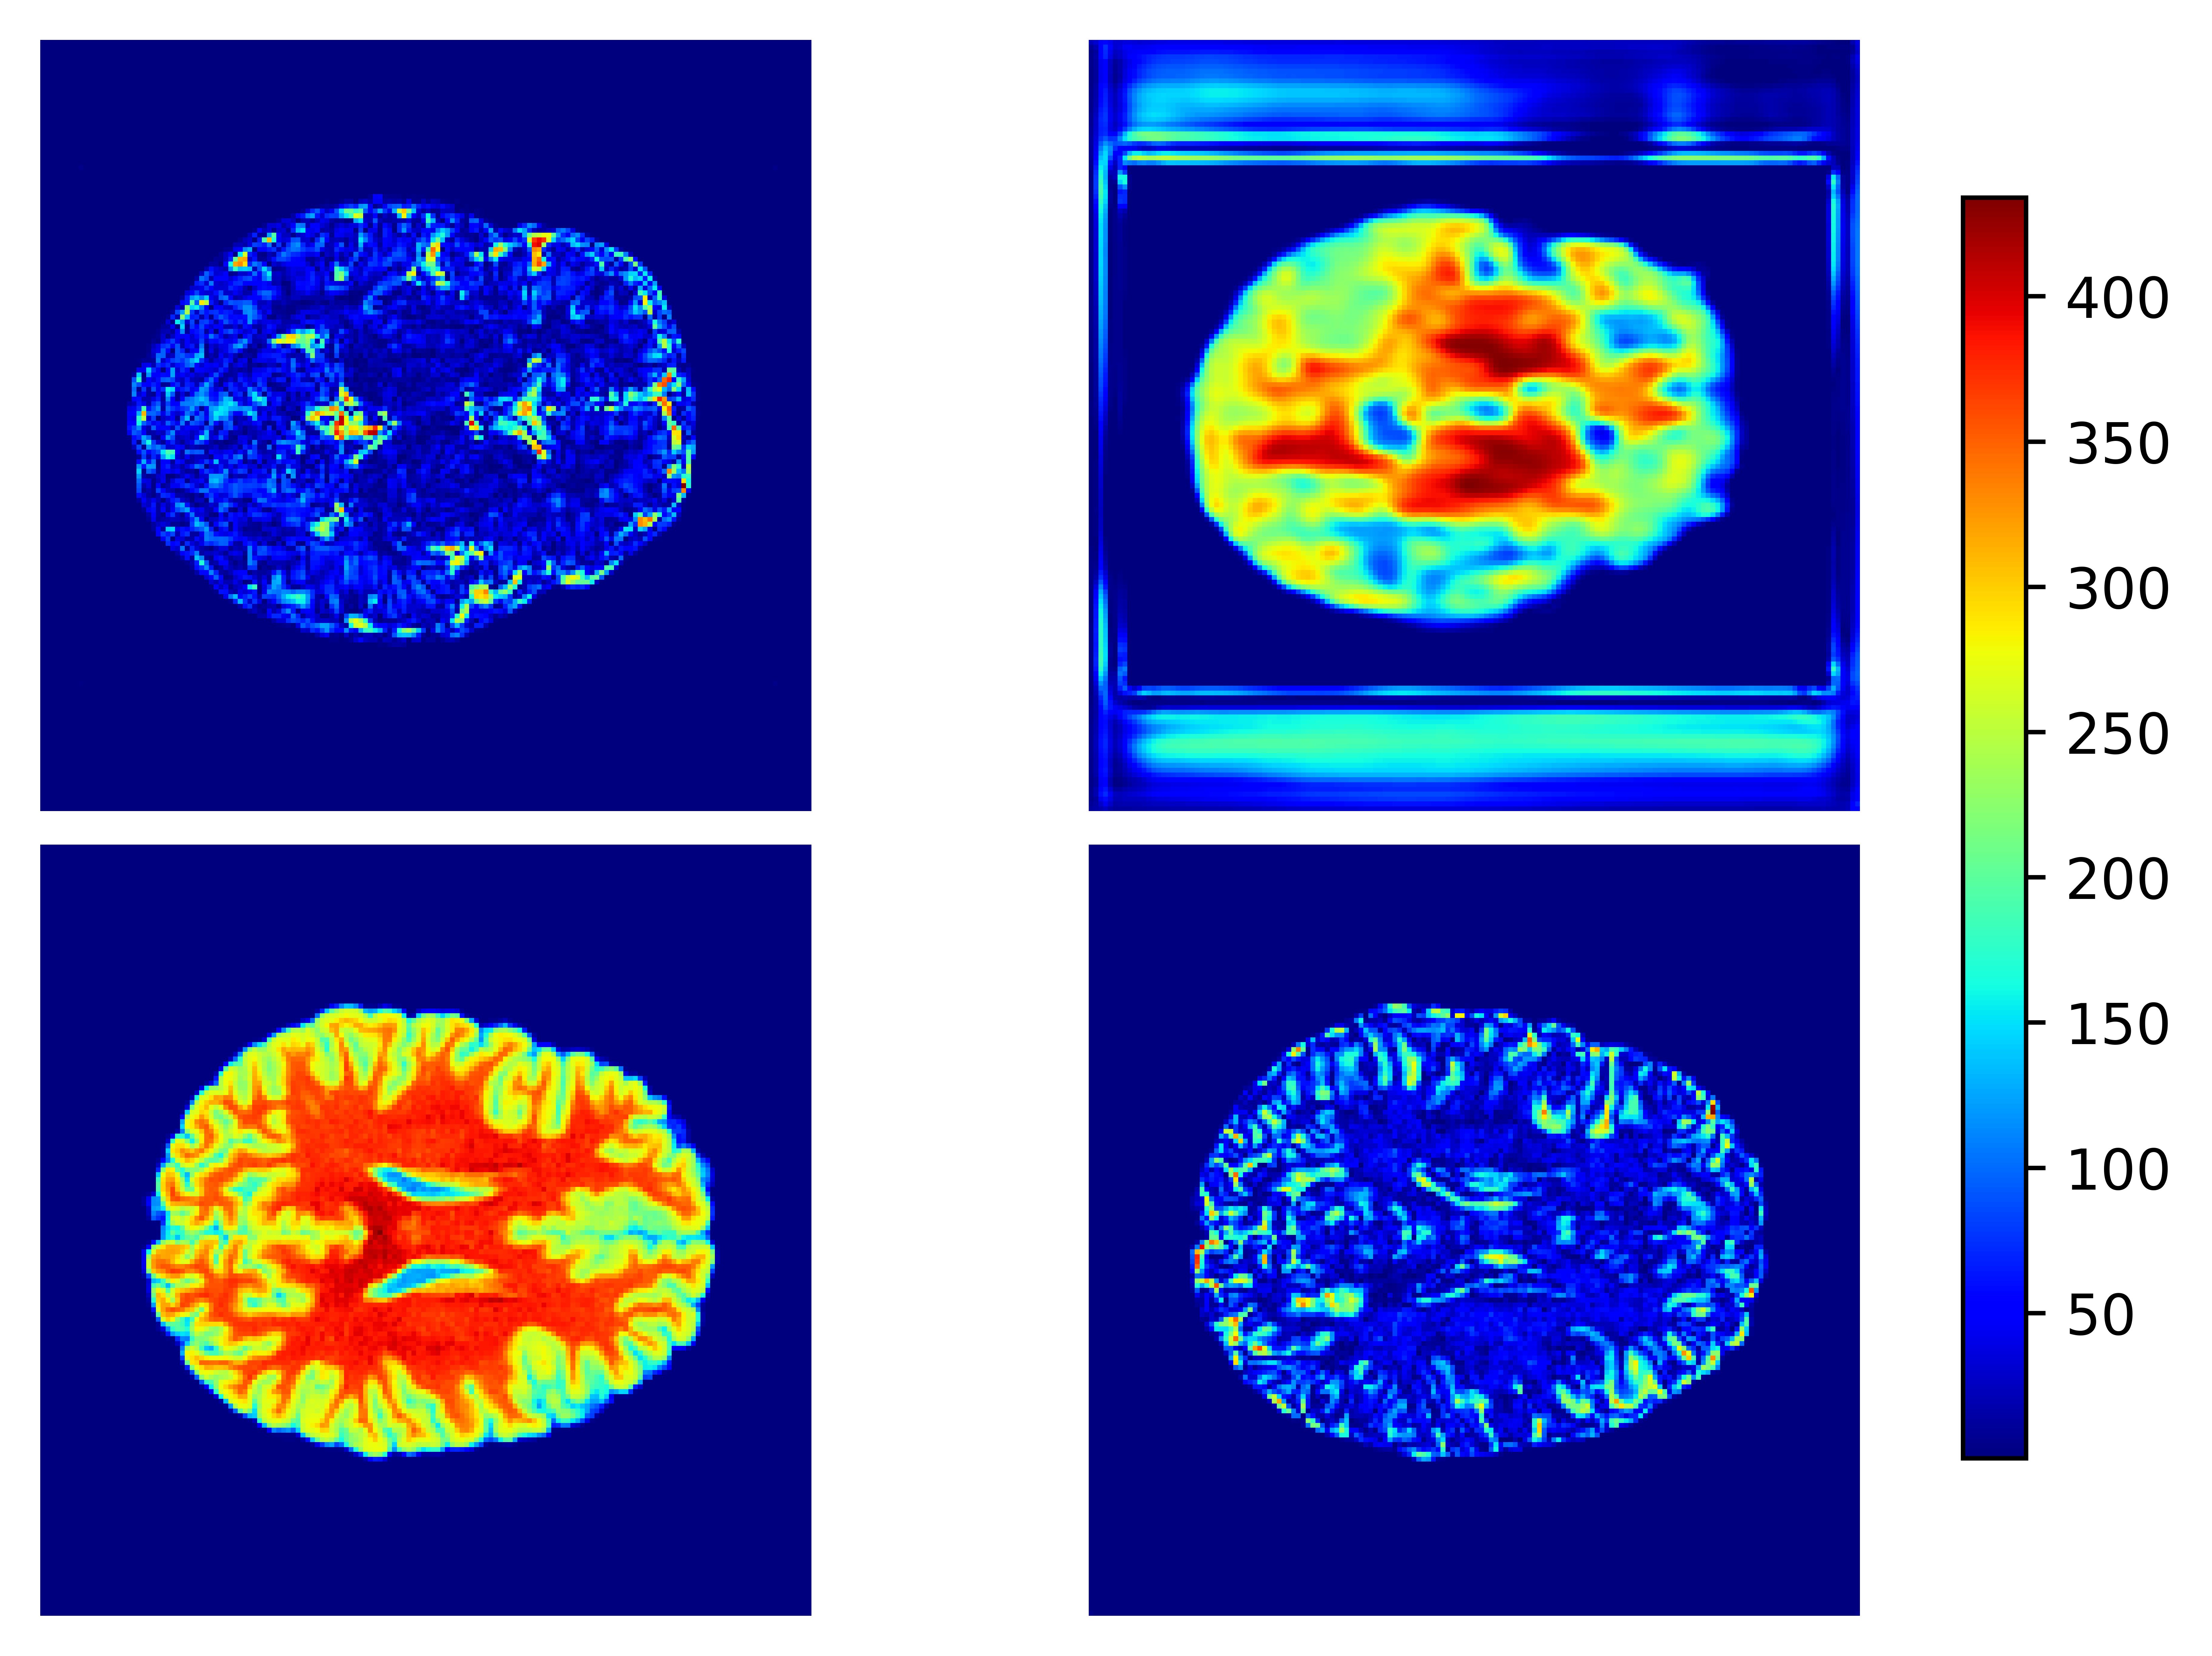

In [48]:
error_dhcp_dhcp = (output_vae_dhcp_dhcp - target_tensor_dhcp).abs().cpu().numpy()[0,0]
error_dhcp_hcp = (output_vae_dhcp_hcp - target_tensor_hcp).abs().cpu().numpy()[0,0]
error_hcp_dhcp = (output_vae_hcp_dhcp - target_tensor_dhcp).abs().cpu().numpy()[0,0]
error_hcp_hcp = (output_vae_hcp_hcp - target_tensor_hcp).abs().cpu().numpy()[0,0]
fig, axes = plt.subplots(2, 2, dpi=1200,constrained_layout=True)
(ax1, ax3), (ax2, ax4) = axes
cm = ax1.imshow(error_dhcp_dhcp[...,image_shape[0]//2],cmap='jet')
ax1.axis('off')
cm = ax2.imshow(error_dhcp_hcp[...,image_shape[0]//2],cmap='jet')
ax2.axis('off')
cm = ax3.imshow(error_hcp_dhcp[...,image_shape[0]//2],cmap='jet')
ax3.axis('off')
cm = ax4.imshow(error_hcp_hcp[...,image_shape[0]//2],cmap='jet')
ax4.axis('off')
cbar = fig.colorbar(cm, ax=axes.ravel().tolist(), shrink=0.8)
plt.savefig(save_path + '/' + 'error_summary' + '.png', dpi=1200)